In [1]:
import joblib
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc, recall_score, precision_score
import matplotlib.pyplot as plt


In [2]:
# Load the model
xgboost_model = joblib.load('grid_search.pkl')
X_test = joblib.load('X_test.pkl')

# Now you can use loaded_model to make predictions or further analysis
y_pred = xgboost_model.predict(X_test)


In [3]:
y_test = joblib.load('y_test.pkl')

# predict

In [4]:
# Best model
best_model = xgboost_model.best_estimator_

In [5]:
# Predict with the best model
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]
# Set a new threshold
threshold = 0.43
# Convert probabilities to binary predictions based on the threshold
y_pred_adjusted = (y_prob >= threshold).astype(int)

# Evaluate with classification report
print("Classification Report:\n", classification_report(y_test, y_pred_adjusted))
# when i have the colsample_bytree = 0.5 threshold = 0.43: 0.61 for both

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1991
           1       0.60      0.60      0.60       509

    accuracy                           0.84      2500
   macro avg       0.75      0.75      0.75      2500
weighted avg       0.84      0.84      0.84      2500



AUC: 0.8419735568407539


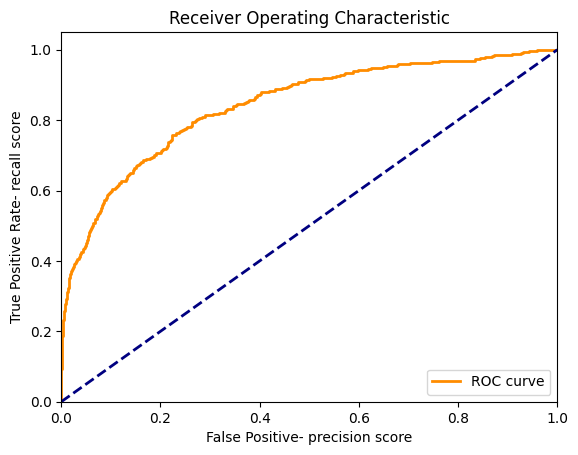

In [6]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive- precision score')
plt.ylabel('True Positive Rate- recall score')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [7]:
recall = recall_score(y_test, y_pred_adjusted)
print("Recall Score:", recall)

Recall Score: 0.6011787819253438


In [8]:
precision = precision_score(y_test, y_pred_adjusted)
print("Precision Score:", precision)

Precision Score: 0.6011787819253438


In [9]:
confusion_matrix(y_test, y_pred_adjusted)

"""actuals on horizontals
# predictions on verticals 
# 0 not exited
# 1 yes exited
# 0,0 = True Neg, 0,1 = False pos - percision score
# 1,1 = True pos, 1,0 = False neg - recall score 
# interested in true pos"""


'actuals on horizontals\n# predictions on verticals \n# 0 not exited\n# 1 yes exited\n# 0,0 = True Neg, 0,1 = False pos - percision score\n# 1,1 = True pos, 1,0 = False neg - recall score \n# interested in true pos'